| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |

# Simple Visualisation:<br> Bivariate, Ternary and Density Plots


`pyrolite` contains an array of visualisation methods, a few of which we'll quickly run through here. For more, check out the [examples gallery](https://pyrolite.readthedocs.io/en/develop/examples/index.html#plotting-examples)!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyrolite.util.synthetic import normal_frame

In [2]:
df = normal_frame(columns=['SiO2', 'CaO', 'MgO', 'FeO', 'TiO2'],     # columns we want for our dataframe - they're all treated the same currently
                  cov=np.eye(4) * np.array([0.35, 0.85, 0.3, 1.1]),  # here we specify a covariance matrix - this simply tells it 'how spread out' we want the data
                  size=1000,                                         # how many 'samples' we want
                  seed=13                                            # specify a random seed - so we have random data, but the same random data each time
                 )

---
## Bivariate Plotting

While there are many ways to get to simple bivariate plots, `pyrolite` provides a few options which can provide a simpler interface and easier access to simple styling configuration.

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

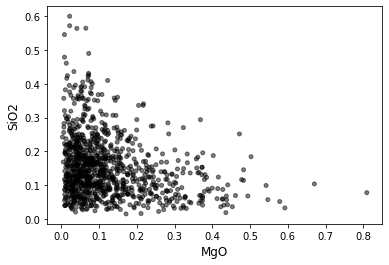

In [3]:
df[['MgO', 'SiO2']].pyroplot.scatter(color='k', marker='o', alpha=0.5)

Where we get to larger datasets, overplotting becomes an issue, and we may want to consider methods for visualising the distribution of data as a whole rather than individual points. `pyrolite` has as few options for this, including 'density' plots and 'heatscatter' plots (based on kernel density estimates).

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

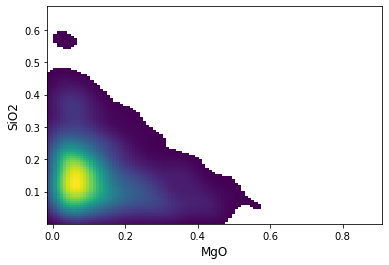

In [4]:
df[['MgO', 'SiO2']].pyroplot.density(bins=100)

While this can look quite nice, and it solves the issue of overplotting we were nearing above, sometimes we want to be able to plot over this and clearly see where new data sits. In this case, we can instead use percentile contours of the kernel density estimate instead:

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

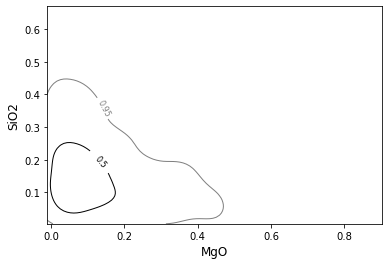

In [5]:
df[['MgO', 'SiO2']].pyroplot.density(bins=100, contours=[0.5, 0.95], colors=['k', '0.5'])

While it does look nice, the data density diagram and contours both show kernel density which crosses the axes - which shouldn't occur when we consider that abundances are positive-only! One way to get around this is to use a log-scaled kernel density grid. We can see that this improves the situation for both figures:

Note also that we can change colormaps - matplotlib has [a decent range to choose from](https://matplotlib.org/stable/tutorials/colors/colormaps.html), noting that you should lean towards linear unidirectional colormaps in most geochemical data cases!

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

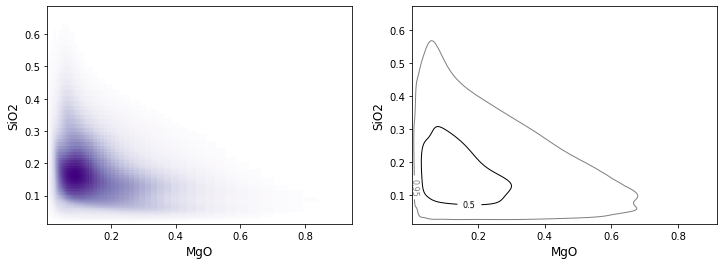

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[['MgO', 'SiO2']].pyroplot.density(ax=ax[0], bins=100, logx=True, logy=True, cmap='Purples')
df[['MgO', 'SiO2']].pyroplot.density(ax=ax[1], bins=100, contours=[0.5, 0.95], colors=['k', '0.5'], logx=True, logy=True)

Another way to visualise your data is to combine summary information provided by the kernel density estimate with the scatter plot to produce a heatscatter plot which retains the best of both worlds. Here we can see the position of each invdividual sample beyond the core of the distribution, and also itentify where the greatest density of samples are:

<AxesSubplot:xlabel='MgO', ylabel='SiO2'>

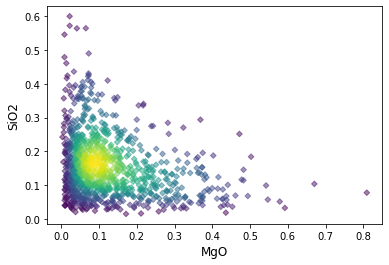

In [7]:
df[['MgO', 'SiO2']].pyroplot.heatscatter(alpha=0.5, logx=True, logy=True)

---
## Ternary Plots

Ternary plots are a common in geochemistry, mineralogy and petrology but dont' necessarily pop up elsewhere. `pyrolite` provides an interface to create ternary plots wherever you pass three columns, making it as simple as creating our bivariate plots above!

<TernaryAxesSubplot:>

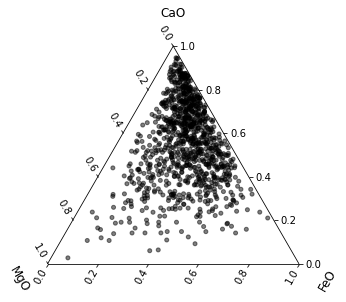

In [8]:
df[['CaO', 'MgO', 'FeO']].pyroplot.scatter(color='k', marker='o', alpha=0.5)

In contrast to most ternary plots, however, we can also create data density visualisations (based on distributions in logratio space):

<TernaryAxesSubplot:>

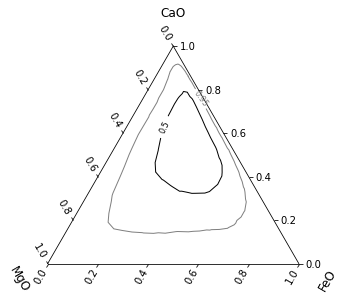

In [9]:
df[['CaO', 'MgO', 'FeO']].pyroplot.density(contours=[0.5, 0.95], colors=['k', '0.5'])

<TernaryAxesSubplot:>

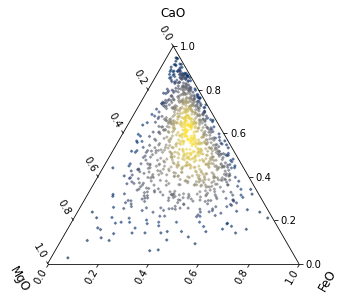

In [10]:
df[['CaO', 'MgO', 'FeO']].pyroplot.heatscatter(alpha=0.5, cmap='cividis', s=3)

---
## Plot Templates

pyrolite provides a few built-in plot templates, with the idea to expand the collection in the near future. 

In [11]:
from pyrolite.plot.templates import pearceThNbYb, TAS

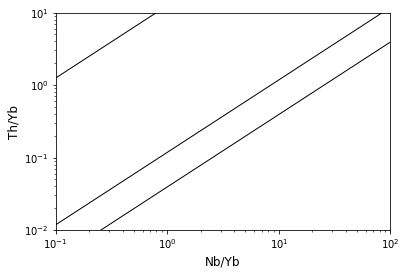

In [12]:
ax = pearceThNbYb()

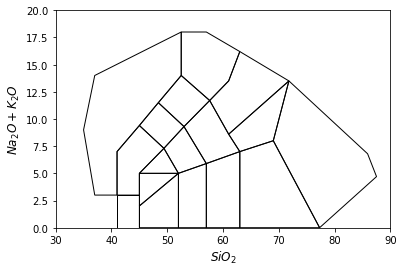

In [13]:
ax = TAS()

This TAS diagram is a litte more than it seems - it's actually built upon a classifer, which will allow you to automatically classify your samples if you have the relevant data:

In [14]:
from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame

df = (
    normal_frame(
        columns=["SiO2", "Na2O", "K2O", "Al2O3"],
        mean=[0.5, 0.04, 0.05, 0.4],
        size=100,
        seed=49,
    )
    * 100 # scaled by 100% for the standard TAS diagram
)
df["Na2O + K2O"] = df["Na2O"] + df["K2O"]

cm =TAS() # TAS classifier model
df["TAS"] = cm.predict(df) # predict what TAS class the samples occupy

<AxesSubplot:xlabel='SiO2', ylabel='Na2O + K2O'>

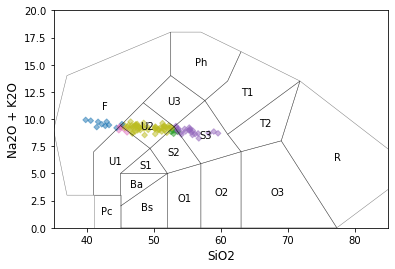

In [15]:
ax = cm.add_to_axes(alpha=0.5, linewidth=0.5, zorder=-1, labels="ID") # add the TAS diagram with the labels to an axis
df[["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c=df['TAS'], alpha=0.5) # plot the data colored by their TAS class

| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |